## Assignment 1 - CS564: Machine Learning


|               |                  |
|---------------|------------------|
| **Name**      | M. Maheeth Reddy |
| **Roll No.**  | 1801CS31         |
| **Date**      | 22-Aug-2021      |

This Notebook contains solutions to the following three clustering algorithms:
- K Means Clustering
- K Medoid Clustering
- Hierarchical Agglomerative Clustering

#### Import Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

#### Reading the CSV file

In [2]:
# reading the dataset csv file
brdata = pd.read_csv('BR_mod.csv')

# fill missing values with modes
brdata.fillna(brdata.mode().iloc[0], inplace=True)

# preview of data
brdata.head()

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,...,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
0,55,0.4,3.0,1.0,1.0,1.0,1,2.0,0.0,0.0,...,4.0,0.0,1.0,2.0,12.0,2,15,13,0.0,0
1,50,1.8,3.0,1.0,1.0,0.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
2,62,1.0,0.0,1.0,1.0,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,6.0,0,5,5,0.0,0
3,52,1.0,4.0,1.0,1.0,3.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0,2,4,0.0,0
4,50,0.0,0.0,1.0,1.0,1.0,1,2.0,0.0,0.0,...,4.0,0.0,0.0,2.0,8.0,0,10,5,1.0,1


In [3]:
# store data in numpy array
brdata = brdata.to_numpy()
brdata

array([[55. ,  0.4,  3. , ..., 13. ,  0. ,  0. ],
       [50. ,  1.8,  3. , ...,  5. ,  0. ,  0. ],
       [62. ,  1. ,  0. , ...,  5. ,  0. ,  0. ],
       ...,
       [68. ,  0.8,  0. , ...,  8. ,  0. , 38. ],
       [61. ,  0.8,  3. , ...,  8. ,  0. , 39. ],
       [46. ,  0.8,  3. , ...,  4. ,  0. , 39. ]])

## K Means Clustering

In [4]:
# function for euclidian distance
def euclid_dist(pt1, pt2):
    dist = (pt1 - pt2)**2
    return np.sum(dist, axis=1)

# function to assign datapoints to clusters
# this function is also used in K Medoids Clustering
def assign_points_to_clusters(K,brdata,centroids):
    clusters = [[] for i in range(K)]
    for i in range(len(brdata)):
        # for a point, find it's distance from each centroid
        dists_to_centroids = euclid_dist(centroids,brdata[i])

        # now get the cluster number to which the point should be assigned
        # the cluster number is the index of minimum distance in the dists_to_centroids array
        cluster_num = np.argmin(dists_to_centroids)

        # assign the point to that cluster
        clusters[cluster_num].append(i)
    return clusters

# function to calculate new centroids from clusters
def calc_new_centroids(brdata,clusters):
    clusters_coords = [brdata[ls] for ls in clusters]
    
    # new centroid of a cluster is mean of the data points in that cluster
    centroids = np.array([cc.mean(axis=0) for cc in clusters_coords])
    return centroids

# function that implements K Means Algorithm
def k_means_clustering(K, brdata):
    # Choose K random datapoints as initial centroids
    centroids_indices = np.random.choice(brdata.shape[0], size=K, replace=False)
    centroids = brdata[centroids_indices]
    #print('Initial Centroids:')
    #print(centroids)

    # storing errors for every iteration of the algorithm
    errors = []

    # counting iterations
    iters = 0
    
    # repeat the loop until the centroids do not change
    prev_centroids = np.array([])
    while (not np.array_equal(prev_centroids, centroids)):
        iters += 1
        
        # assign points to clusters using existing centroids
        clusters = assign_points_to_clusters(K,brdata,centroids)

        # calculate error
        E = 0
        for i in range(len(clusters)):
            for point in clusters[i]:
                E += (brdata[point]-centroids[i])**2
        errors.append(E.sum())

        prev_centroids = centroids
        
        # calculate new centroids based on the clusters
        centroids = calc_new_centroids(brdata,clusters)


    #print('\nFinal Centroids:')
    #print(centroids)
    
    #print('\nIterations:',iters)
    return centroids,clusters,errors

In [5]:
# K is number of clusters
K = 30

# perform K means Clustering on given data
centroids,clusters,errors = k_means_clustering(K,brdata)

# show the clusters
print(f"""
K-means clustering
==================
Number of Clusters = {K}
Total no. of points = {brdata.shape[0]}

List of Clusters: (only indices of points in input data are shown)
------------------------------------------------------------------
""")

for i in range(K):
    print(f"Cluster {i+1}: {len(clusters[i])} points")
    print(clusters[i],'\n')


K-means clustering
Number of Clusters = 30
Total no. of points = 1097

List of Clusters: (only indices of points in input data are shown)
------------------------------------------------------------------

Cluster 1: 72 points
[393, 410, 415, 428, 448, 464, 514, 515, 516, 521, 531, 534, 537, 545, 554, 570, 584, 585, 605, 614, 650, 659, 662, 665, 678, 679, 681, 683, 684, 696, 712, 713, 728, 730, 751, 758, 779, 803, 807, 821, 827, 831, 832, 835, 836, 848, 850, 851, 856, 863, 865, 868, 877, 882, 885, 889, 890, 892, 910, 911, 927, 928, 931, 934, 942, 947, 952, 961, 966, 967, 981, 1017] 

Cluster 2: 28 points
[387, 460, 470, 529, 536, 553, 566, 587, 597, 623, 716, 733, 752, 774, 777, 782, 888, 905, 912, 914, 915, 916, 944, 945, 971, 1013, 1015, 1063] 

Cluster 3: 33 points
[1, 4, 14, 18, 21, 29, 31, 38, 81, 95, 98, 100, 102, 106, 107, 109, 114, 135, 165, 292, 304, 310, 325, 333, 334, 355, 374, 378, 385, 391, 396, 456, 596] 

Cluster 4: 7 points
[103, 474, 653, 871, 878, 940, 1043] 

Cluste

Plot of errors after each iteration in K-means clustering


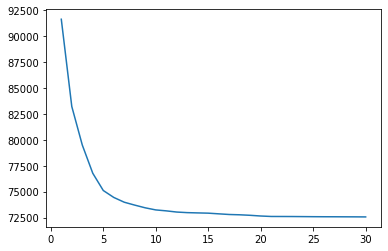

In [6]:
# Notice the error is reducing during every iteration of the clustering
print('Plot of errors after each iteration in K-means clustering')
plt.plot([i+1 for i in range(len(errors[1:]))], errors[1:])

## K-Medoids Clustering

In [39]:
# calculating cost for given medoids,clusters
def calc_cost(brdata, medoids, clusters):
    E = 0
    for i in range(len(clusters)):
        for point in clusters[i]:
            E += (brdata[point]-medoids[i])**2
    return E.sum()

# function to get the non medoids
def get_non_medoids(medoids_indices,clusters):
    non_medoids = []
    for cluster in clusters:
        for point in cluster:
            if point not in medoids_indices:
                non_medoids.append(point)
    return non_medoids

# get the index of a point from given data
def get_index(brdata,point):
    for i in range(len(brdata)):
        if np.array_equal(brdata[i],point):
            return i
    return -1

# get the indices of points from given data
def get_indices(brdata,points):
    indices = []
    for point in points:
        indices.append(get_index(brdata,point))
    return indices

# function that implements k means clustering
def k_medoids_clustering(K, brdata):
    # initial K medoids chosen randomly
    medoids_indices = np.random.choice(brdata.shape[0], size=K, replace=False)
    medoids = brdata[medoids_indices]
    
    # initial clusters
    clusters = assign_points_to_clusters(K,brdata,medoids)
    print('Initial Medoids:')
    print(medoids)
    
    # initial cost
    cost = calc_cost(brdata,medoids,clusters)
    
    # storing costs after every iteration
    costs = [cost]
    
    # counting iterations
    iters = 1
    while (True):
        print('Iteration',iters)
        
        # calculating the best medoid set that gives the lowest cost
        best_medoids = medoids
        lowest_cost = cost
        
        # check by replacing every medoid by every non-medoid
        for medoid in medoids:
            # get all non-medoids
            non_medoids = brdata[get_non_medoids(medoids_indices,clusters)]
            
            # find the best non-medoid replacement for the current medoid by iterating over all non-medoids
            for sample in non_medoids:
                # make a copy of the set of medoids
                new_medoids = medoids.copy()
                #print('new_medoids.shape =',new_medoids.shape)
                #print('new_medoids[medoids == medoid]:',new_medoids[medoids == medoid], new_medoids[medoids == medoid].shape)
                #print('sample.shape:',sample.shape)
                
                # replace the current medoid with current non-medoid
                new_medoids[get_index(new_medoids,medoid)] = sample
                
                # compute the cost of clusters formed with the new medoids
                new_clusters = assign_points_to_clusters(K,brdata,new_medoids)
                new_cost = calc_cost(brdata,new_medoids,new_clusters)
                
                # if new cost is lower than the current lowest cost, update the lowest cost and the best medoid set
                if new_cost < lowest_cost:
                    lowest_cost = new_cost
                    best_medoids = new_medoids
                
        # store the lowest cost and best medoid set on the whole
        print(f'lowest_cost={lowest_cost} cost={cost} lowest_cost < cost={lowest_cost < cost}')
        if lowest_cost < cost:
            cost = lowest_cost
            medoids = best_medoids
            costs.append(cost)
            medoids_indices = get_indices(brdata,medoids)
        else:
            break
        iters += 1
    
    # compute the final clusters
    final_clusters = assign_points_to_clusters(K,brdata,medoids)
    
    print('\nFinal Medoids:')
    print(medoids)
    
    return medoids,final_clusters,costs

In [40]:
# K is number of clusters
K = 10

# perform K-medoid clustering
medoids,clusters,costs = k_medoids_clustering(K,brdata)

# print the clusters
print(f"""
K-medoids clustering
==================
Number of Clusters = {K}
Total no. of points = {brdata.shape[0]}

List of Clusters: (only indices of points in input data are shown)
------------------------------------------------------------------
""")

for i in range(K):
    print(f"Cluster {i+1}: {len(clusters[i])} points")
    print(clusters[i],'\n')

Initial Medoids:
[[67.   1.   3.   1.   1.   0.   1.   1.   0.   0.   1.  19.   0.   2.
   2.   0.   0.   2.   6.   0.   5.   5.   0.   5. ]
 [50.   0.6  0.   1.   1.   1.   1.   1.   0.   0.   0.  14.   0.   3.
   1.   0.   0.   2.   8.   0.   5.   8.   0.  10. ]
 [90.   1.   4.   1.   1.   1.   1.   2.   0.   0.   0.   3.   0.   2.
   3.   1.   0.   2.   8.   2.   4.   8.   1.   8. ]
 [71.   1.8  4.   1.   0.   3.   1.   1.   0.   0.   1.   2.   0.   2.
   0.   0.   0.   2.   5.   0.   1.   5.   0.   5. ]
 [35.   1.6  0.   1.   1.   2.   1.   1.   0.   6.   0.   4.   0.   3.
   1.   0.   1.   2.   6.   0.   5.   5.   0.  14. ]
 [66.   0.8  3.   1.   1.   3.   1.   1.   0.   0.   1.   3.   0.   2.
   0.   0.   0.   2.   5.   0.   0.   5.   0.  12. ]
 [61.   1.8  4.   0.   0.   0.   1.   1.   0.   0.   1.   1.   0.   2.
   0.   0.   0.   1.   2.   2.   1.   4.   1.  25. ]
 [64.   1.8  4.   1.   1.   0.   1.   1.   0.   6.   1.   4.   0.   2.
   3.   0.   0.   2.   5.   0.   5.   4.   0

Plot of costs after each iteration in K-medoid clustering


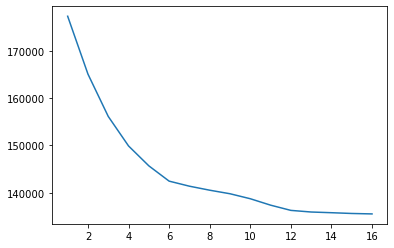

In [43]:
# Notice the error is reducing during every iteration of the clustering
print('Plot of costs after each iteration in K-medoid clustering')
plt.plot([i+1 for i in range(len(costs[1:]))], costs[1:])

## Hierarchial Agglomerative Clustering

In [46]:
# Define Cluster class
class Cluster:
    def __init__(self, index):
        self.index = index
        self.parent = None
        self.next = None
    
    # Creating clusters as a linked list
    # This is the function to cluster the datapoints
    def cluster(self, new_point):
        parent = self
        while(parent.next != None):
            parent = parent.next
        while(new_point.parent != None):
            new_point = new_point.parent
        # Clustering (adding the new point to linked list)
        parent.next = new_point
        new_point.parent = parent


In [47]:
# Function to merge two clusters in Proximity Matrix
def merge_clusters(x,y,proximity):
    for i in range(len(proximity[x])):
        proximity[x][i] = min(proximity[x][i], proximity[y][i])
        proximity[y][i] = np.inf
        proximity[i][x] = min(proximity[i][x], proximity[i][y])
        proximity[i][y] = np.inf
    proximity[x][x] = np.inf
    return


In [48]:
# Function for Hierarchial Clustering Algorithm
def hierarchial_clustering(brdata,cutoff):
    # Start with each datapoint as individual clusters
    clusters = []
    for i in range(len(brdata)):
        clusters.append(Cluster(i))
    
    # Compute the Proximity Matrix
    proximity = np.zeros((len(brdata),len(brdata)))
    for i in range(len(brdata)):
        proximity[i] = np.linalg.norm(brdata[i].T-brdata,axis=1,ord=2)
    proximity[proximity == 0] = np.inf
    
    # Merge the closest clusters until we get the desired clusters
    while(not np.all(proximity==np.inf)):
        # Find the closest clusters
        closest_cluster_indices = np.argwhere(proximity == np.min(proximity))[0]
        
        # Cutoff when we get desired clusters
        if(np.min(proximity) >= cutoff):
            break
        
        # Merge the closest clusters
        clusters[closest_cluster_indices[0]].cluster(clusters[closest_cluster_indices[1]])
        merge_clusters(closest_cluster_indices[0], closest_cluster_indices[1], proximity)
    
    # Calculate the final number of clusters
    final_count = 0
    for i in range(len(clusters)):
        if(clusters[i].parent == None):
            final_count += 1

    return clusters,final_count


In [75]:
clusters,final_count = hierarchial_clustering(brdata,cutoff=10)

print(f'''
List of Clusters ({final_count} clusters):
=================
''')
for i in range(len(clusters)):
    if(clusters[i].parent == None):
        cur = clusters[i]
        cl_ls = []
        while (cur != None):
            cl_ls.append(cur.index)
            cur = cur.next
        print('Cluster',str(i)+' ('+str(len(cl_ls))+' point(s)):')
        print(cl_ls,'\n')



List of Clusters (41 clusters):

Cluster 0 (1 point(s)):
[0] 

Cluster 1 (1046 point(s)):
[1, 5, 8, 145, 9, 125, 128, 27, 46, 49, 44, 78, 58, 156, 157, 113, 111, 133, 163, 143, 26, 130, 146, 159, 56, 75, 94, 87, 80, 217, 219, 105, 164, 121, 118, 280, 36, 85, 37, 89, 155, 162, 77, 170, 188, 232, 182, 223, 183, 212, 250, 174, 177, 205, 202, 243, 179, 196, 190, 216, 222, 244, 220, 173, 69, 180, 187, 201, 206, 248, 238, 11, 257, 352, 371, 399, 427, 455, 421, 524, 443, 603, 598, 457, 564, 546, 602, 557, 652, 666, 350, 516, 590, 769, 763, 785, 599, 748, 607, 754, 787, 813, 833, 820, 826, 842, 862, 873, 830, 822, 859, 824, 852, 609, 561, 740, 771, 853, 737, 790, 412, 449, 426, 436, 447, 510, 611, 533, 600, 574, 583, 578, 595, 588, 579, 622, 664, 407, 651, 794, 142, 166, 167, 408, 442, 839, 845, 840, 425, 148, 434, 520, 131, 433, 445, 458, 275, 522, 543, 526, 17, 48, 127, 136, 175, 241, 254, 193, 242, 231, 194, 247, 172, 197, 236, 19, 66, 40, 41, 289, 297, 91, 53, 186, 226, 195, 199, 246, 284

Text(0, 0.5, 'No. of Clusters')

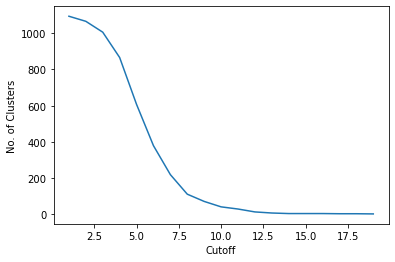

In [76]:
# Perform clustering for varying cutoff points
cluster_numbers = []
for cutoff in range(1, 20):
    _,count = hierarchial_clustering(brdata,cutoff)
    cluster_numbers.append(count)

# We can see the reduction in number of clusters with increasing cutoff distances
plt.plot(range(1,20), cluster_numbers)
plt.xlabel("Cutoff")
plt.ylabel("No. of Clusters")

## End